For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import linear regression implementation
from linear_regression import LinearRegression

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

In [5]:
lin_reg = LinearRegression(learning_rate=0.001, epochs=25000)

lin_reg.fit(data['Net_Activity'], data['Energy'])
predictions = lin_reg.predict(data['Net_Activity'])

<IPython.core.display.Latex object>

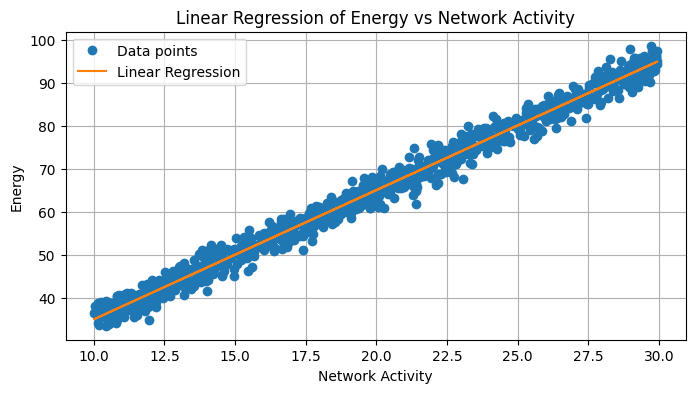

In [6]:
from IPython.display import Latex
display(Latex(r'Energy consumption formula: $E = %.2f \cdot \mathrm{X} + %.2f$' % (lin_reg.weight.round(2), lin_reg.bias.round(2))))

# Plot linear regression results
plt.figure(figsize=(8, 4))
plt.title('Linear Regression of Energy vs Network Activity')
plt.plot(data['Net_Activity'], data['Energy'], 'o', label='Data points')
plt.plot(data['Net_Activity'], predictions, label='Linear Regression')
plt.xlabel('Network Activity')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

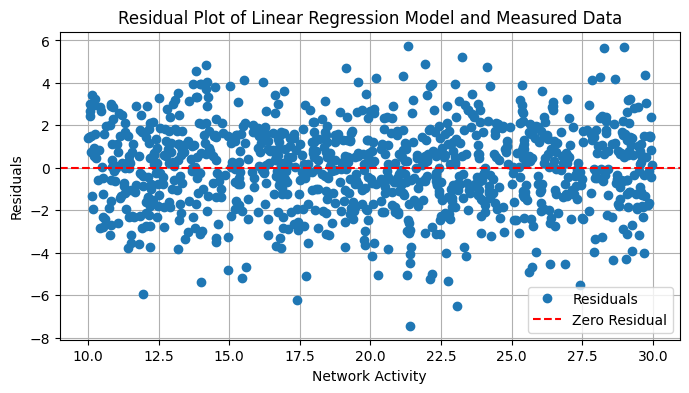

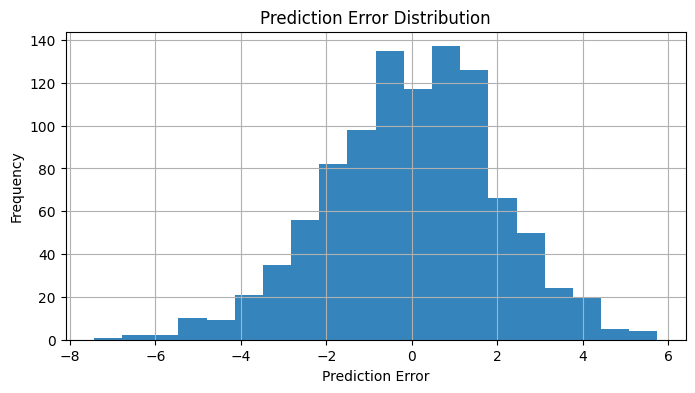

In [109]:
# Plot residuals and prediction error distribution

residuals = data['Energy'] - predictions

plt.figure(figsize=(8, 4))
plt.title('Residual Plot of Linear Regression Model and Measured Data')
plt.plot(data['Net_Activity'], residuals, 'o', label='Residuals')
plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Network Activity')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Prediction Error Distribution')
plt.hist(residuals, bins=20, alpha=0.9)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Mission 1 - Task 2: Discussion
- **(a)** The visualization of the fitted linear curve can be seen in the first plot above, together with the derived energy consumption formula $$E = 3.06 \cdot \mathrm{X} + 3.84$$
- **(b)** Looking at the residual plot of our linear regression model (prediction error distribution), we can clearly see symmetry between the data points on both sides of the zero residual line, both in density and magnitude of the residual. There is some difference in that the negative side has two data points under 6. This symmetry is relatively constant for all values of network activity, indicating that the variance is approximately constant. These patterns are all indicators of a good curve fit. Looking at the prediction error distribution, we see that the prediction errors follow a gaussian distribution with an expected value of approximately zero. An unbiased estimator is an estimator whose expected value equals the true value of the parameter it is trying to estimate.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
# Import logistic regression implementation
from logistic_regression import LogisticRegression

In [9]:
data = pd.read_csv('mission2.csv')

train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[['x0', 'x1']].values
y_train = train['y'].values

X_test = test[['x0', 'x1']].values
y_test = test['y'].values

#### Analyzing the Data

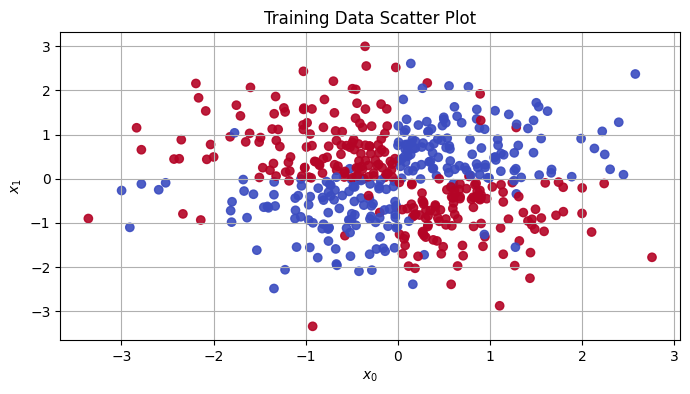

In [12]:
# Scatter plot of training data points
plt.figure(figsize=(8, 4))
plt.title('Training Data Scatter Plot')
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap=plt.cm.coolwarm, alpha=0.9)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.grid(True)
plt.show()

#### Feature Engineering

In [ ]:
train.loc[:, 'x0_x1'] = train['x0'] * train['x1']
test.loc[:, 'x0_x1'] = test['x0'] * test['x1']

X_train_fe = train[['x0', 'x1', 'x0_x1']].values
X_test_fe = test[['x0', 'x1', 'x0_x1']].values

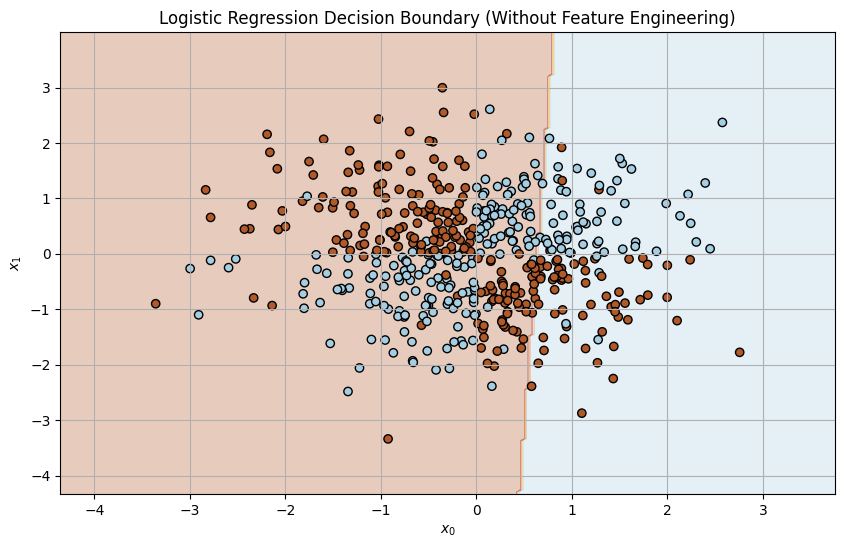

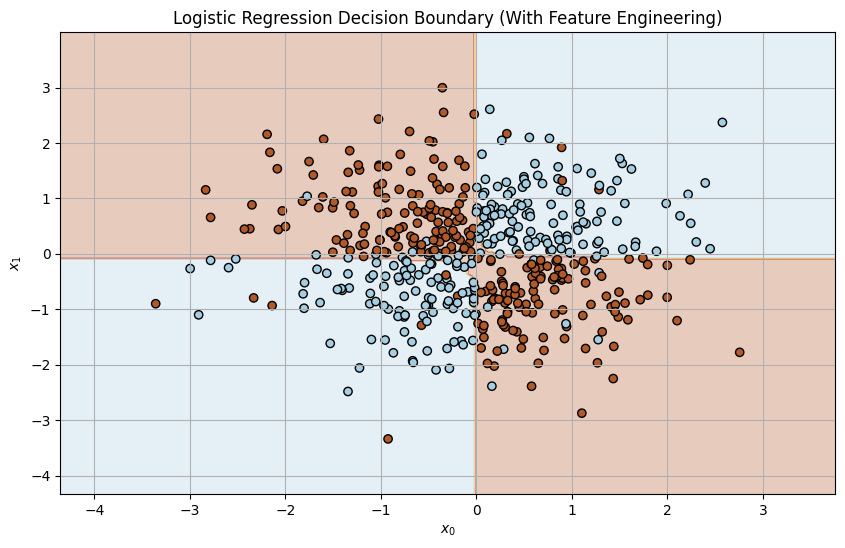

In [16]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_fe = np.c_[xx.ravel(), yy.ravel(), (xx * yy).ravel()]

log_reg = LogisticRegression(learning_rate=0.01, epochs=5000)

log_reg.fit(X_train, y_train)
Z = log_reg.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Logistic Regression Decision Boundary (Without Feature Engineering)')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.grid(True)
plt.show()

log_reg.fit(X_train_fe, y_train)
Z_fe = log_reg.predict(grid_fe)
Z_fe = Z_fe.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_fe, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_fe[:, 0], X_train_fe[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Logistic Regression Decision Boundary (With Feature Engineering)')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.grid(True)
plt.show()


In [17]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=5000)
log_reg.fit(X_train_fe, y_train)
predictions = log_reg.predict(X_test_fe)
accuracy = log_reg.accuracy(y_test, predictions)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.896


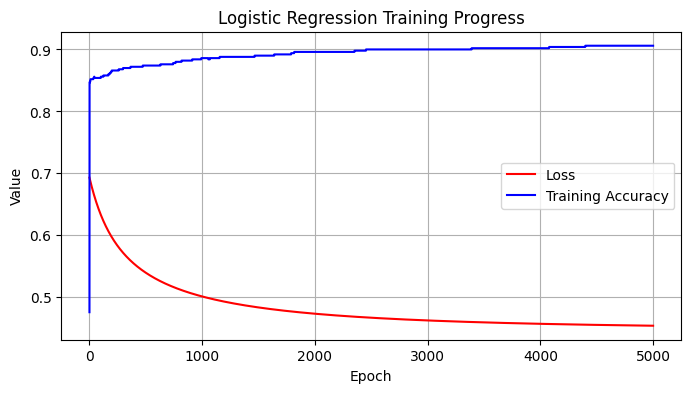

In [18]:
epoch_list = np.arange(log_reg.epochs)
plt.figure(figsize=(8, 4))
plt.title('Logistic Regression Training Progress')
plt.plot(epoch_list, log_reg.losses, c='red', label='Loss')
plt.plot(epoch_list, log_reg.train_accuracies, c='blue', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

#### 3. Discussion

- **(a)** The poor initial performance as seen in the decision boundary plot without feature engineering comes from the fact that there is no linear relationship between the features of the data set that can determine SkyNet's binary decision (class) using logistic regression.

- **(b)** The model's inductive bias is the very fact that logistic regression only can separate classes using a linear decision boundary. It's important because it determines what kinds of problems a model can solve, and understanding it can help choose the right models and potential new features for the problem.

- **(c)** Trying to solve the problem with `sklearn.tree.DecisionTreeClassifier`:

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
dt_accuracy = np.mean(dt_predictions == y_test)
print(f"Decision Tree Test accuracy: {dt_accuracy}")

Decision Tree Test accuracy: 0.902


- The decision tree classifier solved the problem when setting `max_depth=2` because the tree got enough flexibility to separate the decision space into four regions, which is correct for this problem.

- **(d)** Plotting the ROC curve:

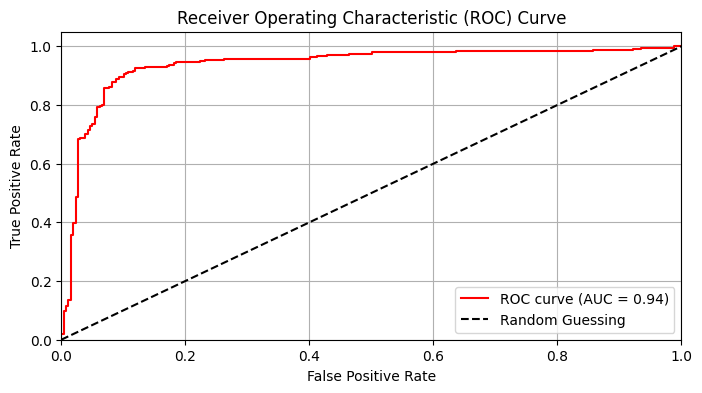

In [25]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = log_reg.predict_proba(X_test_fe)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [4]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

#### Decision tree classifier for intercepted communications processing

**Analyzing the Data**

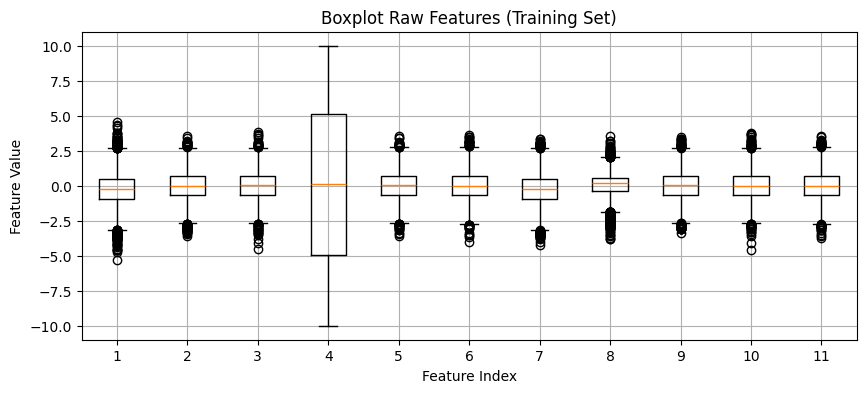

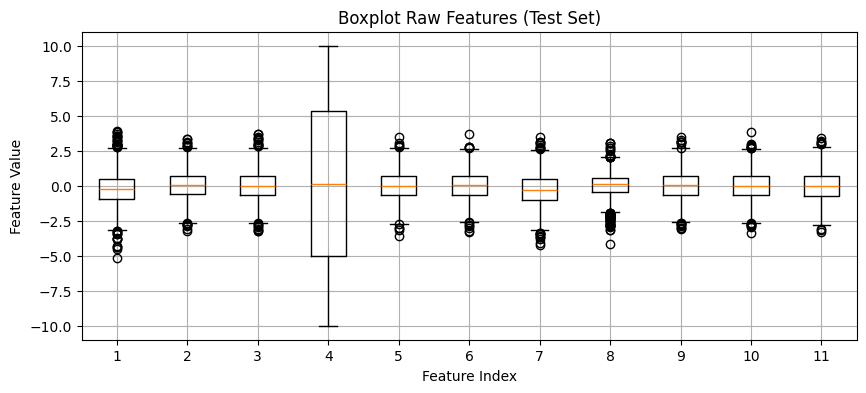

In [25]:
plt.figure(figsize=(10, 4))
plt.boxplot(train.drop(columns=['target']).values)
plt.title('Boxplot Raw Features (Training Set)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.boxplot(test.drop(columns=['target']).values)
plt.title('Boxplot Raw Features (Test Set)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.grid(True)
plt.show()

- By looking at the box plots for the training and test data set, we notice that the data from `data_stream_3` stands out from the rest.

In [ ]:
X_train = train.drop(columns=['target'])
X_test = test.drop(columns=['target'])

# Transform data_stream_3 by converting to large integers and taking modulo 2
# to create a binary feature, capturing decimal variations in the raw data.
train_bin = (X_train['data_stream_3'] * 1e3).astype(int) % 2
test_bin = (X_test['data_stream_3'] * 1e3).astype(int) % 2

X_train['data_stream_binary'] = train_bin
X_test['data_stream_binary'] = test_bin

y_train = train['target'].values
y_test = test['target'].values

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC data_stream_3 without hyperparameter tuning: {roc_auc:.4f}")

ROC AUC data_stream_3 without hyperparameter tuning: 0.5845


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 7, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_dt_clf = grid_search.best_estimator_

y_pred_proba_tuned = best_dt_clf.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"ROC AUC data_stream_3 with hyperparameter tuning: {roc_auc_tuned:.4f}")

ROC AUC data_stream_3 with hyperparameter tuning: 0.7256


In [50]:
print(f"Best hyperparameters:\n\t-max_depth: {best_dt_clf.max_depth}\n\t-min_samples_split: {best_dt_clf.min_samples_split}\n\t-min_samples_leaf: {best_dt_clf.min_samples_leaf}\n\t-max_features: {best_dt_clf.max_features}")

Best hyperparameters:
	-max_depth: 5
	-min_samples_split: 5
	-min_samples_leaf: 1
	-max_features: None


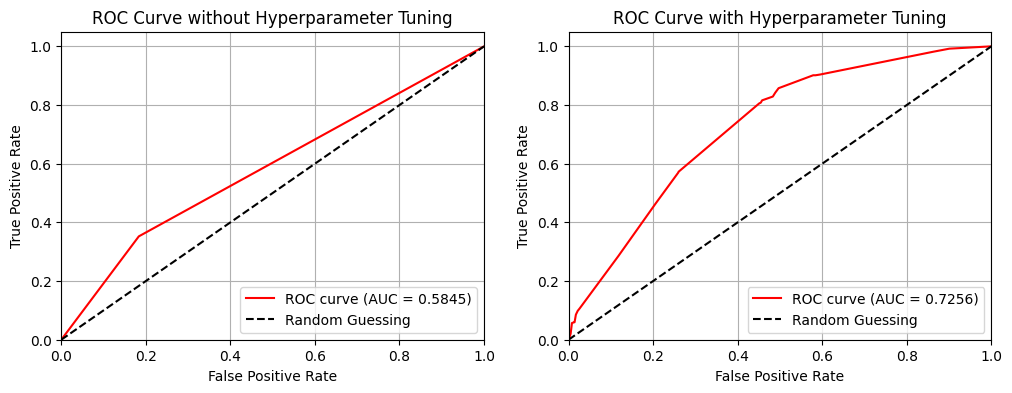

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axs[0].plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.4f})')
axs[0].plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guessing')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve without Hyperparameter Tuning')
axs[0].legend(loc='lower right')
axs[0].grid(True)

fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
axs[1].plot(fpr_tuned, tpr_tuned, color='red', label=f'ROC curve (AUC = {roc_auc_tuned:.4f})')
axs[1].plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guessing')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve with Hyperparameter Tuning')
axs[1].legend(loc='lower right')
axs[1].grid(True)

**Random Forest Classifier**
- Using `sklearn`'s Random Forest Classifier for the same problem:

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Random Forest Classifier: {roc_auc_rf:.4f}")

ROC AUC Random Forest Classifier: 0.7295


#### 2. Discussion
- **(a)** First, I analyzed the data by looking at the box plots for the different data stream features and noticed that `data_stream_3` stood out. From the task description, I know I had to transform the data into a binary representation based on whether or not the value was even or odd. Since most data points were non-integers, I had to capture all the information from the decimal part by scaling to the closest integer before taking the modulo. Then I tried the Decision Tree Classifier with default hyperparameters on the transformed data set, and got the ROC AUC result of 0.5845. By using the `GridSearchCV` from `sklearn` I was able to find the best parameter set from the parameter grid I made, which resulted in an acceptable ROC AUC score of 0.7256.

- **(b)** ROC AUC is a robust method for binary classification like in this case, because it measures the model's ability to distinguish between classes across all the different classification thresholds. Therefore, it's a good indicator of the performance for binary classification. We can come to the conclusion that the Decision Tree Classifier with tuned hyperparameters is better than the default one by only looking at the ROC curves. We know that a curve closer to the top left corner indicates better model performance, because we then have a high TPR and low FPR. Since the ROC curve for the tuned hyperparameter model more steeply tends towards the top left corner, we know that it performs better than the default one.

- **(c)** By using the Random Forest Classifier, I was able to achieve an even higher ROC AUC score of 0.7295, which is a little better than the tunes Decision Tree Classifier.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [8]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

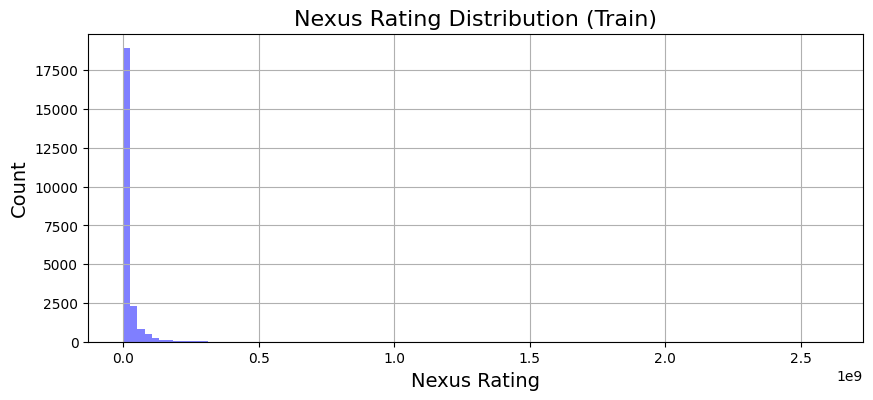

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [10]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
